In [4]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

In [139]:
from matplotlib.colors import ListedColormap

In [70]:
lx1 = [randint(70,100) for _ in range(42)]
ly1 = [randint(0,100) for _ in range(42)]
list(zip(lx1,ly1))
#x2 = [randint(0,50) for _ in range(42)]
#y2 = [randint(0,45) for _ in range(42)]

[(94, 90),
 (88, 8),
 (86, 21),
 (97, 30),
 (87, 97),
 (72, 82),
 (88, 54),
 (91, 53),
 (81, 9),
 (94, 0),
 (73, 32),
 (85, 32),
 (76, 85),
 (75, 24),
 (93, 54),
 (83, 40),
 (94, 61),
 (80, 53),
 (74, 81),
 (71, 62),
 (88, 59),
 (83, 52),
 (99, 74),
 (94, 35),
 (92, 62),
 (97, 0),
 (92, 63),
 (84, 5),
 (79, 61),
 (81, 40),
 (75, 1),
 (94, 11),
 (80, 14),
 (83, 14),
 (100, 24),
 (97, 81),
 (100, 1),
 (100, 38),
 (77, 60),
 (98, 47),
 (83, 52),
 (96, 6)]

In [176]:
rgen = np.random.RandomState(47)

x1 = rgen.normal(loc=80.0,scale=10.0, size= 42)
y1 = rgen.normal(loc=50.0,scale=18.0, size= 42)

x2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
y2 = rgen.normal(loc=30.0,scale=8.0, size= 42)
k1 = np.array([x1, y1])
k2 = np.array([x2, y2])


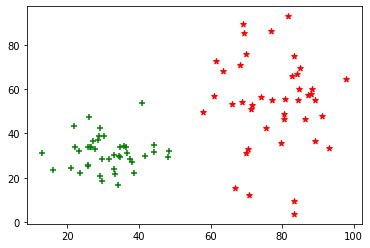

In [177]:
plt.scatter(k1[0], k1[1],  color='red', marker='*', label='class 1')
plt.scatter(k2[0], k2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()


In [154]:
class Perceptron:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X,y):
                update = self.eta * (target - self.predict(xi))
                
                self.w_[1:] = update * xi
                self.w_[0] -= update 
                
                errors += int( update != 0.0)
                
            self.errors_.append(errors)
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)

In [89]:
print(k1)
print(k1.T)
k1.T.shape

[[71.51990524 93.05906358 89.24207966 86.40411801 69.45263017 97.97760715
  69.8721325  88.23623324 77.05349647 74.07529428 66.06272941 91.04179672
  70.67659714 70.56843563 84.36606232 87.9495827  87.19533153 80.87662257
  66.77251594 80.51793979 61.65204742 83.27496473 84.76237234 81.68428646
  71.37588669 89.07444498 84.22889373 57.87571047 63.45794259 83.21375264
  75.37325646 69.19249795 76.8622586  69.82148113 84.994227   79.70053759
  80.47090105 68.29141238 60.87472709 82.7154222  83.22065299 68.68999841]
 [52.84150052 33.43284399 36.57362218 46.32416439 85.39492679 64.82023002
  30.96528835 59.91888859 54.9342185  56.61133636 53.52600802 47.95648329
  12.3993129  33.08963813 54.96525292 57.69692343 57.50143398 55.43157045
  15.50005225 46.75869388 72.85359438  3.63771117 60.03835184 93.00237616
  51.13440969 55.31372365 66.95229264 49.50414448 68.37677792  9.57108441
  42.66994121 89.45082623 86.12775932 75.72464945 69.60939752 35.83272311
  48.63342648 70.76812639 56.99739108

(42, 2)

In [178]:
k1 = k1.T
k2 = k2.T

In [179]:

X = np.zeros( (84,2) )
X[:42] = k1
X[42:] = k2
X /= 100 

In [180]:
y = np.ones( (84), dtype=int )
y[:42] = -1
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [181]:
X.shape

(84, 2)

In [183]:
rgen = np.random.RandomState(1)
rgen.shuffle(X)
rgen.shuffle(y)


In [184]:
ppn = Perceptron( eta=0.1, n_iter=5, random_state=1)
ppn.fit(X,y)



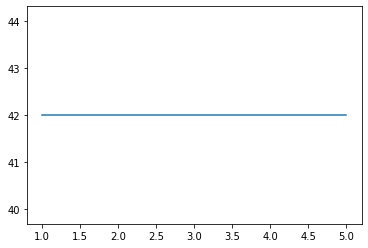

In [185]:
plt.plot(range(1, len(ppn.errors_)+ 1), ppn.errors_ )
plt.show()

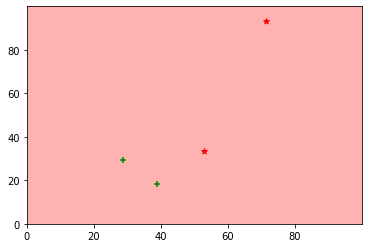

In [186]:
x1_min, x1_max = 0,100
x2_min, x2_max = 0,100
resol = 0.01

cmap = ListedColormap(['red', 'blue'])

xx1, xx2 = np.meshgrid(
                       np.arange(x1_min, x1_max, resol), 
                       np.arange(x2_min, x2_max, resol) 
                      )
Z = ppn.predict(
                np.array([xx1.ravel(), xx2.ravel()] ).T
                )
Z = Z.reshape(xx1.shape)

plt.contourf( xx1, xx2, Z, alpha=0.3, cmap=cmap )
plt.scatter(k1[0], k1[1],  color='red', marker='*', label='class 1')
plt.scatter(k2[0], k2[1],  color='green', marker='+', label='class 2')
#plt.axis('off')
plt.show()